In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords

In [2]:
corpus = []
f = open('casos.txt','r',encoding = 'utf-8').readlines()
for i in range(len(f)):
    corpus.append(f[i].lower())
    print(corpus[i])

el respectivo informe nos da a conocer una investigación que se viene realizando en contra de walter orlando monzon vasquez (48) ante una presunta comisión del delito contra la libertad- violacion de la libertad sexual en la modalidad violacion sexual,  en agravio de la menor con iniciales a.a.a.n (17). en donde la denunciante luisa edelmira navarro guerrero refiere que su sobrina viene siendo abusada sexualmente por su padrastro walter orlando monzon vasquez (48). además declara que la menor venía recibiendo amenazas por parte del denunciado quien le hacía tomar bebidas alcohólicas y pastillas abortivas. por otro lado refiere que la menor ya tiene un proceso de violencia desde el año 2013. así mismo la decisión que se llegó a tomar estando a los considerados precedentes y de conformidad al establecido en el inciso 2, art. 124° del código procesal penal, este cuarto despacho de la tercera fiscalía provincial corporativa especializada en violencia contra las mujeres y los integrantes de

In [3]:
train_x = corpus

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
stop_list = sorted(stopwords.words('spanish'))
more_stopwords = ['año','años','dos','art','si','da','al','algo','den','yo','ya','av','00','02','05','10','11','12','124','14','16','17','198','1995','2013','2014','2020','2022','2023','21','23','25','2591','26','30','30abr23','32', '48', '4ta','50','743']
for word in more_stopwords:
    stop_list.append(word)
print(stop_list)
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(train_x)
# print(vectorizer.get_feature_names_out())

['a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'contra', 'cual', 'cuando', 'de', 'del', 'desde', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'entre', 'era', 'erais', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras', 'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuviéramos', 'estuviésemos', 'estuvo', 'está', 'estábamos', 'estáis', 'están', 'estás', 'esté', 'estéis', 'estén', 'estés', 'fue', 'fuera', 'fuerais', 'fueran', 'fueras', 'fueron', 'fuese', 'fueseis', 'fuesen', 'fueses', 'fu

In [6]:
bag_of_words = vectorizer.get_feature_names_out()
vocabulario = {}
# print(bag_of_words)
for word in bag_of_words:
    vocabulario[word] = 0
for caso in train_x:
    for word in bag_of_words:
        if word in caso and word not in stop_list:
            vocabulario[word] += 1
print(vocabulario)

{'00': 0, '02': 0, '05': 0, '10': 0, '11': 0, '12': 0, '124': 0, '14': 0, '16': 0, '17': 0, '198': 0, '1995': 0, '2013': 0, '2014': 0, '2020': 0, '2022': 0, '2023': 0, '21': 0, '23': 0, '25': 0, '2591': 0, '26': 0, '30': 0, '30abr23': 0, '32': 0, '48': 0, '4ta': 0, '50': 0, '743': 0, 'abortivas': 1, 'abril': 1, 'abusada': 1, 'abuso': 1, 'abusó': 1, 'acercándose': 1, 'acontecimiento': 1, 'acontecimientos': 1, 'acta': 1, 'actividad': 1, 'acto': 1, 'acuerdo': 2, 'acusación': 1, 'además': 1, 'adolescencia': 1, 'afectación': 1, 'agarró': 1, 'agraviada': 1, 'agraviado': 1, 'agravio': 2, 'agresiones': 1, 'agresiva': 1, 'agresividad': 1, 'agresión': 1, 'agresor': 1, 'al': 0, 'alcohólicas': 1, 'alejandro': 1, 'algo': 0, 'alteración': 1, 'ambiente': 1, 'ambos': 1, 'amenazas': 1, 'analizar': 1, 'analmente': 1, 'anamnesis': 1, 'anormal': 1, 'ante': 0, 'anteriormente': 1, 'antes': 0, 'anticipadas': 1, 'análisis': 1, 'aplicados': 1, 'aproximadamente': 1, 'aracelli': 1, 'area': 1, 'art': 0, 'asimismo

In [7]:
df = pd.DataFrame(data=bag_of_words, columns=['Palabra'])
df['contador'] = vocabulario.values()
df.sort_values(by='contador', ascending= False, inplace=True)

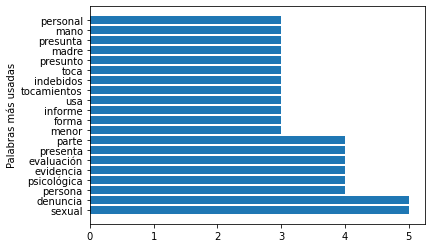

In [8]:
plt.barh(df['Palabra'].head(20),df['contador'].head(20))
plt.ylabel("Palabras más usadas")
plt.show()

## Bi-grams

In [9]:
train_x_bi = corpus

In [10]:
vectorizer_bi = CountVectorizer(stop_words=stop_list, ngram_range=(2,2))
vectors_bi = vectorizer_bi.fit_transform(train_x_bi)

In [11]:
palabras_bigram = vectorizer_bi.get_feature_names_out()
len(palabras_bigram)

722

In [12]:
vocab_bigram = {}
for frase in palabras_bigram:
    vocab_bigram[frase] = 0
for caso in train_x:
    for frase in palabras_bigram:
        if frase in caso:
            vocab_bigram[frase] += 1
print(vocab_bigram)

{'abortivas lado': 0, 'abril horas': 0, 'abusada sexualmente': 1, 'abuso carácter': 0, 'abuso sexual': 1, 'abusó analmente': 1, 'acercándose dedo': 0, 'acontecimiento resultados': 0, 'acontecimientos acuerdo': 0, 'acta intervención': 0, 'actividad nivel': 0, 'acto agresión': 0, 'acuerdo cuanto': 0, 'acuerdo mencionado': 0, 'acuerdo parte': 0, 'acuerdo sociocultural': 0, 'acusación acuerdo': 0, 'acusación organicidad': 0, 'además declara': 1, 'adolescencia sido': 0, 'afectación psicológica': 1, 'agarró mano': 0, 'agraviada diligencia': 0, 'agraviada efectos': 0, 'agraviado manifiesta': 1, 'agravio menor': 0, 'agresiones sexuales': 1, 'agresiones verbales': 1, 'agresiva raíz': 0, 'agresividad física': 1, 'agresión sexual': 1, 'agresor diferencia': 0, 'alcohólicas pastillas': 0, 'alejandro josue': 1, 'alteración área': 0, 'ambiente estresante': 1, 'ambos padres': 1, 'ambos progenitores': 1, 'amenazas parte': 0, 'analizar informe': 0, 'analmente llevó': 0, 'anamnesis personal': 1, 'anormal

In [13]:
df_bi = pd.DataFrame(data=palabras_bigram, columns=['Palabra'])
df_bi['contador'] = vocab_bigram.values()
df_bi.sort_values(by='contador', ascending= False, inplace=True)

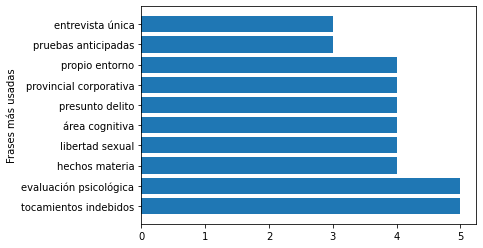

In [14]:
plt.barh(df_bi['Palabra'].head(10),df['contador'].head(10))
plt.ylabel("Frases más usadas")
plt.show()